# Notebook written by Roberta Carluccio on 5/09/2021 some contents have been edited from Stanford AI Lab

# Clustering Analysis

Clustering is a type of unsupervised learning. A clustering algorithm examines a set of data points and automatically identifies groups of data points that are related or similar to each other.

This differs from supervised learning, where you have a training set with both input features (x) and labels (y). In supervised learning, the dataset includes the inputs (x) along with the target outputs (y). However, in unsupervised learning, you are provided with a dataset that only contains the inputs (x) without the labels or target outputs (y).

Since we don't have target labels (y) in unsupervised learning, we can't tell the algorithm the "right answer" or the desired output (y) we want it to predict. Instead, we ask the algorithm to find something interesting or meaningful within the data.
![alt](../img/cluteringexample.jpg) 


# The K-means Algorithm 

The K-means algorithm is a popular clustering method used in unsupervised machine learning. 
Its main goal is to divide a dataset into a specified number (K) of distinct clusters or groups, where each data point belongs to the cluster with the nearest mean (centroid).
![alt](../img/cluteringexample2.png) 

# The K-means intuition 

The first thing that the K-means algorithm does is take a random guess at where the centres of the clusters might be. In the above example, We have asked the algorithm to find two clusters. 

Initially, the algorithm will randomly select two points as cluster centres—these are just random initial guesses and are not necessarily good, but it's a starting point.

The K-means algorithm performs two main tasks:

1 - It assigns points to the nearest cluster centroids.

2 - It moves the cluster centroids closer to the average locations of their assigned points.
    
The algorithm will repeat these two steps—reassigning points and adjusting centroids—until no more changes occur. The goal of the K-means algorithm is to find the optimal assignment of points to cluster centroids and the optimal locations of the centroids that minimise the squared distance between the points and their respective centroids, which is known as the cost function or distortion.




<a name="1"></a>
## Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).


# INITIALISING K-MEANS

The very first step of the K-means clustering algorithm is to choose random locations as initial guesses for the cluster centroids ($\mu_{1}$ through $\mu_{k}$. But how do you actually make that random guess?

One approach is to try different random choices for the initial centroid locations to give K-means multiple attempts at finding the best local optimum. Alternatively, you can run K-means multiple times and evaluate the results. After running K-means multiple times, you can compute the cost function for each set of clusters found and select the one with the lowest cost function value (J).

***Key Points***:

Number of Clusters (K): The user must decide on the number of clusters (K) before running the algorithm, which can be determined using methods like the elbow method or silhouette analysis.

***Centroids***: These are the mean positions of all the points within each cluster, representing the "centres" of the clusters.

***Cost Function***: K-means aims to minimise the sum of squared distances (distortion) between each data point and its nearest centroid.                                                         

# Choosing the Number of Clusters

There are techniques to help automatically choose the number of clusters (K).

***The Elbow Method***: This involves plotting the cost function against the number of clusters. The point where the cost function begins to decrease more slowly resembles an elbow; this is often considered the recommended number of clusters.

It's generally not advisable to choose an excessively large value for K. Instead, you can evaluate K-means based on how well it performs for the intended purpose, using a trade-off approach to manually determine the best value of K.



In [1]:
#==========================================================================
# import libraries
#==========================================================================
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [6]:
# Load an example dataset that we will be using
X = np.load("data/ex7_X.npy")

In [7]:
print("First five elements of X are:\n", X[:5], "\nThese are the points coordinates") 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]] 
These are the points coordinates
The shape of X is: (300, 2)


### Finding closest centroids

The K-means algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. 
Let's implement it 
    
<a name="ex01"></a>

* This function takes the data matrix `X` and the locations of all centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm
 


In [8]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    # Loop over the points
    for i in range(X.shape[0]):
        
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        
        # Loop to calculate the closest centroid to a point
        for j in range(centroids.shape[0]):
            norm_ij = LA.norm(X[i] - centroids[j]) #the norm between (X[i] - centroids[j])
            distance.append(norm_ij)
            
        # Returns the indices of the minimum values along an axis  
        idx[i] = np.argmin(distance)
        

    return idx

In [9]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0 2 1]


<a name="1.2"></a>
### Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>
Please complete the `compute_centroids` below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [10]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    # Loop over the centroids
    for k in range(K):   
        points = X[idx == k] # Get a list of all data points in X assigned to centroid k  (idx == k)

        centroids[k] = np.mean(points, axis = 0) # Compute the mean of the points assigned

    return centroids

In [11]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [12]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    
    Args:
        X (ndarray):   (m, n) Data points
        centroids (ndarray): initial centroid (K, n) 
        max_iters = series of iterations N
        plot_progress = plot graph every iteration or final result only
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed over series of iterations
        
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [13]:
# Plot the examples

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)
    
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)
    
def plot_data_points(X, idx):
    # Define colormap to match Figure 1 in the notebook
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


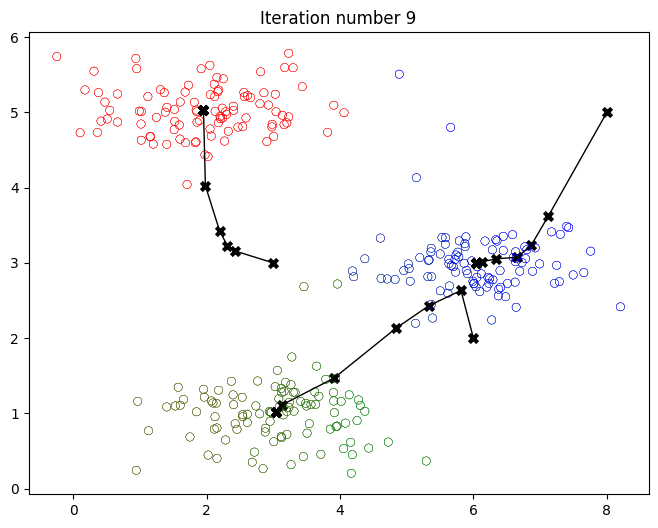

In [14]:
# Load an example dataset
X = np.load("data/ex7_X.npy")

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Random initialization

The code first randomly shuffles the indices of the examples (using np.random.permutation()).
Then, it selects the first examples based on the random permutation of the indices.
This allows the examples to be selected at random without the risk of selecting the same example twice.

In [15]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


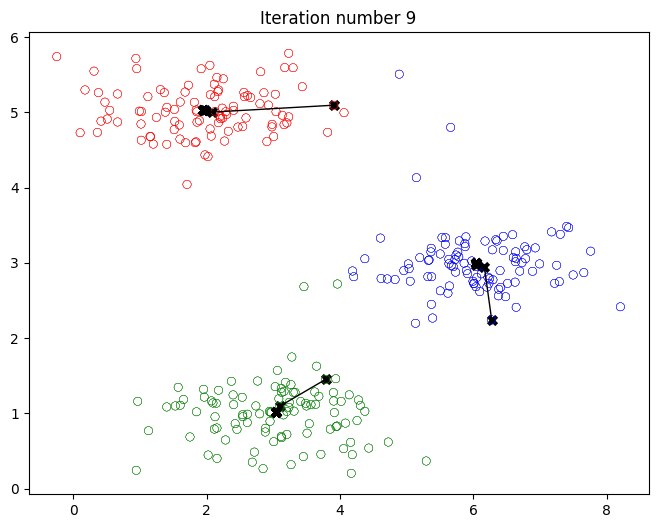

In [16]:
# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)